<a href="https://colab.research.google.com/github/LiterallyRicky/DataScience-A2/blob/main/Ricky_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?


**Answer1:**

***Quoted from the Notes:*** All 348 values in the bikes data set have a small enough influence that we can almost completely trust elpd_loo's recommendation. We also get the value of elpd_loo, and its standard error. **But these are useless without another model to compare them too.**

Since we do not have another model to compare the elpd_loo values, it's essentially useless to do elpd_loo or

```
az.loo()
```





**Task2**:

Describe overfitting, in the context of this course

**Answer2:**

Overfitting is having too many number of variables, making/letting our model to be distracted by unneccessary information or information that isn't too important for the final result.

**Task3**:

How do we mitigate overfitting?

**Answer3:**

Having a model that doesn't have too many variables, but rather having a model with the smallest number of variables would be our best to avoid overfitting. With this, the variables that are chosen would not let our model get distracted by unneccessary information.

**Task4**:

How do we mitigate underfitting?

**Answer4:**

Underfitting would be mitigated by selecting a model where it's based on elpd_loo, to be accurate.

**Task5**:

Why would we want more than one predictor in a model?

**Answer5:**

Well, to make our model more challenging. Somewhat. Essentially, by using more than one predictor in a model shows how powerful a model can become and having a more accurate outcome with more variables. And with this, we can see how different variables affect the prediction.



**Task6**:

Can we have too many predictors? How would we now?

**Answer6:**

Of course, to the point where our model can be overflooded with too many predictors and providing unneccessary information, this being called overfitting.

**Task7**:

What is variable selection, and how does it work?

**Answer7:**

Variable selection are the arising questions when choosing multiple predictors:


*   do we really need multiple predictors?
*   if so, how many do we need?
*   and which ones? Are some better than others? The same as others?

Like having logical questions come up when you are handed multiple predictors and that process of answering the questions is variable selection. Somewhat narrowing down the choice/options of variables.


**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

**Answer8:**

1.) In the standard linear regression model with 2 predictors, the categorical variable and the numeric variable are included directly as predictors. This model assumes the numeric variable has the same effect on the outcome across all levels of the categorical variable.

2.) The hierarchial model takes a different approach  by allowing the effect of the numeric variable to vary across the levels of the categorical variable, but it connects these group-specific effects through a shared pattern. Basically, the second model would allow for the slopes to change between categories, being useful if you think there might be differences amongst groups.

3.) The third model allows the effect of the quantitative variable to vary across categories, as did the second model. However, instead of relating these variations via a common structure, the third model includes an interaction term that allows the categorical variable to affect the slope directly.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

**Answer9:**

To visualize multiple linear regression models, you could do:

```
bmb.interpret.plot_predictions()
```
To show the comparison between linear regression models.


**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [ ]:
!pip install git+https://github.com/pydata/xarray.git

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-fpr88izs
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-fpr88izs
  Resolved https://github.com/pydata/xarray.git to commit 5279bd15708e21ea582e56e4f27fc3e9663a8509
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import xarray as xr

In [ ]:
!pip install bambi

  Using cached bambi-0.15.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached formulae-0.5.4-py3-none-any.whl.metadata (4.5 kB)
Using cached bambi-0.15.0-py3-none-any.whl (109 kB)
Using cached formulae-0.5.4-py3-none-any.whl (53 kB)


In [ ]:
import bambi as bmb

In [ ]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp", "3PA":"TPA"}, inplace=True)

<ipython-input-12-259ee861cc1b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb.rename(columns={"FT%":"FTp","FG%":"FGp", "3PA":"TPA"}, inplace=True)


Output()

Output()

Output()

Output()

ERROR:pymc.stats.convergence:There were 14 divergences after tuning. Increase `target_accept` or reparameterize.


Output()

Output()

Output()

Output()

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

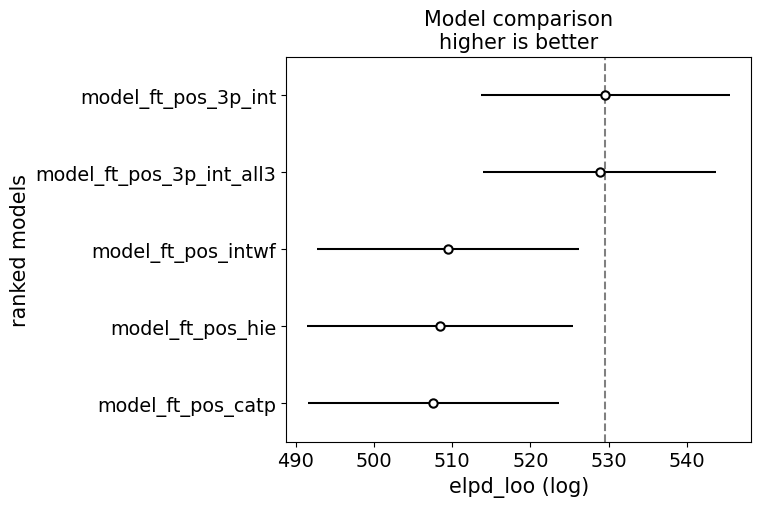

In [ ]:
model_ft_pos_catp = bmb.Model("FGp ~ FTp + Pos", data=bb)
model_ft_pos_hie = bmb.Model("FGp ~ (FTp|Pos)", data=bb)
model_ft_pos_intwf = bmb.Model("FGp ~ FTp + Pos + FTp:Pos", data=bb)
model_ft_pos_3p_int_all3 = bmb.Model("FGp ~ FTp + Pos + TPA + FTp:Pos + FTp:TPA + Pos:TPA", data=bb)
model_ft_pos_3p_int = bmb.Model("FGp ~ FTp + Pos + TPA + Pos:TPA", data=bb)

az.plot_compare(az.compare({
    "model_ft_pos_catp":model_ft_pos_catp.fit(idata_kwargs={'log_likelihood': True}),
    "model_ft_pos_hie":model_ft_pos_hie.fit(idata_kwargs={'log_likelihood': True}),
    "model_ft_pos_intwf":model_ft_pos_intwf.fit(idata_kwargs={'log_likelihood': True}),
    "model_ft_pos_3p_int_all3":model_ft_pos_3p_int_all3.fit(idata_kwargs={'log_likelihood': True}),
    "model_ft_pos_3p_int":model_ft_pos_3p_int.fit(idata_kwargs={'log_likelihood': True})
}))

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

**Answer11:**

The model with all three variables is better according to this metric. This model performs best since it incomporates an interaction term that way more detailed than the other models. With the more detailed relationship, the more accurate and "better" the model becomes.